In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [62]:
df = pd.read_csv('bballref_data/pca99_2000_to_2020.csv', index_col=0)
df.shape
df.head()

(6541, 37)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36
player,,,,,,,,,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,1.582029,0.718002,-2.347141,-1.023740,-1.227685,-1.149832,0.487955,-0.166080,-0.653862,-0.300328,...,-0.363222,0.614682,0.418361,0.014211,0.455057,-0.254280,0.270108,0.318613,-0.409518,0.235943
Shareef Abdur-Rahim 2000,3.028892,4.997782,-0.402883,-1.008014,-0.020860,-1.786071,-0.943786,0.957723,-1.119694,1.952744,...,-0.262376,-1.186366,-0.513348,-0.320960,0.047409,-0.738132,-0.577500,0.010153,0.142028,0.144905
Ray Allen 2000,-1.905600,6.021082,1.088306,-1.093299,-0.722031,-0.664112,-0.913143,0.070823,0.708269,-0.054850,...,0.800465,0.048532,-0.063802,0.464804,0.197250,-0.682299,-0.135248,0.228988,0.476303,-0.043915
John Amaechi 2000,3.163037,2.007952,-3.940483,-1.440910,-0.204868,-1.218001,-0.814199,-0.244380,0.739363,1.017194,...,0.258671,0.408627,0.083577,-1.180703,0.079209,0.473111,-1.099946,-0.142794,0.269871,0.582303
Derek Anderson 2000,-1.627456,2.969162,-1.762392,-0.408649,0.135164,-0.236023,-1.050065,-1.349802,-0.494563,-0.173574,...,-0.177542,0.161454,0.316578,0.085692,0.427062,-0.049190,0.060498,0.298316,-0.413848,-0.188796


## Determine number of clusters (AIC, BIC, Silouette Score)

Wall time: 2min 21s


Text(0.5, 0, 'Number components')

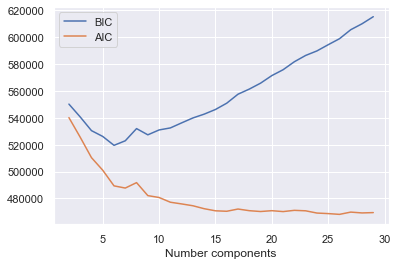

In [50]:
%%time

range_n_components = np.arange(2,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

Wall time: 24 s


C:\Users\alexk\anaconda3\envs\nba\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Silhouette Sore')

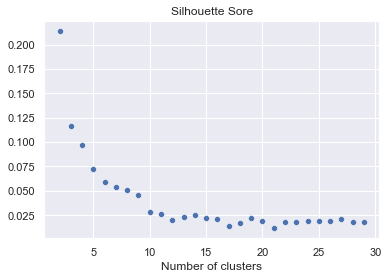

In [51]:
%%time
## Evaluate silhoutte score for each model
labels = {n: model.predict(df) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df, labels[n], random_state=seed) for n in range_n_components]
sns.scatterplot(range_n_components, silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

## Build GMM, cluster

In [ ]:
GaussianMixture?

In [63]:
%%time
n_comps = 11

gmm = GaussianMixture(n_components=n_comps, covariance_type='full', max_iter=10_000, n_init=10, random_state=seed)
gmm.fit(df)

hard_labels = gmm.predict(df)
soft_labels = gmm.predict_proba(df)
df_clusters = pd.DataFrame(hard_labels, index=df.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters = df_clusters.round(6)  ## for better visual
df_clusters.head()

Wall time: 33.5 s


,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
player,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,6,0.0,0.000000,0.000369,0.000000,0.0,0.0,0.999631,0.0,0.0,0.000000,0.0
Shareef Abdur-Rahim 2000,6,0.0,0.000025,0.000000,0.000000,0.0,0.0,0.999975,0.0,0.0,0.000000,0.0
Ray Allen 2000,1,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
John Amaechi 2000,2,0.0,0.000000,0.989118,0.000000,0.0,0.0,0.010882,0.0,0.0,0.000000,0.0
Derek Anderson 2000,3,0.0,0.000000,0.000000,0.997889,0.0,0.0,0.001756,0.0,0.0,0.000354,0.0


In [64]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

3     1059
10     981
0      715
1      641
6      631
5      629
9      614
7      516
2      379
8      220
4      156
Name: label, dtype: int64

In [65]:
# 11 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

3     1059
10     981
0      715
1      641
6      631
5      629
9      614
7      516
2      379
8      220
4      156
Name: label, dtype: int64

In [16]:
## 10 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

2    1079
4     834
6     808
1     743
3     702
5     602
8     591
9     546
0     356
7     280
Name: label, dtype: int64

In [21]:
## 14 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

3     836
4     798
2     657
0     621
6     563
9     482
10    437
8     434
5     408
13    396
1     301
7     249
11    206
12    153
Name: label, dtype: int64

In [ ]:
## 8 clusters, n_init=5, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=10, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 10 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

### Look at clusters

In [66]:
## Sample each cluster

for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(20)[['label', f'cluster_{n}']])
    print('\n')

label: 0 total: 715
                         label  cluster_0
player                                   
Stephen Graham 2009          0   0.999996
Toney Douglas 2014           0   0.999220
Mario Hezonja 2017           0   0.997768
Trevor Booker 2015           0   0.773053
Chris Jefferies 2003         0   0.999998
Semaj Christon 2017          0   0.999326
Larry Hughes 2006            0   0.989163
George Lynch 2005            0   0.999881
Jeremy Pargo 2013            0   1.000000
Jeff Teague 2010             0   1.000000
Luke Walton 2013             0   0.999845
Patrick Beverley 2013        0   0.999974
Lindsey Hunter 2005          0   0.999991
Ronnie Brewer 2011           0   0.980355
Eric Williams 2004           0   0.980054
Devin Brown 2009             0   0.999869
Eric Bledsoe 2011            0   0.998740
Isaiah Whitehead 2017        0   0.999899
Delon Wright 2019            0   0.999526
Donatas Motiejūnas 2014      0   1.000000


label: 1 total: 641
                            label 

In [67]:
## with n clusters = 18
players  = [
            'Chris Paul',
            'Steve Nash',
            'Tony Parker',
            'Jamal Crawford',
            'Lou Williams',
            'Goran Dragic'
            'Kobe Bryant',
            'LeBron James',
            'Paul Pierce',
            'Dirk',
            'Kobe',
            'Yao',
            'Chris Webber'
            "Shaquille O'Neal",
            'Dwight Howard',
            'Roy Hibbert',
            'Marcus Smart',
            'Jae Crowder'
            'Draymond Green',
            'Stephen Curry',
            'Klay Thompson',
            'Eddie House',
            'Peja',
            'Rashard Lewis'
            'Jameer Nelson',
            'Ray Allen',
            'Kevin Garnett',
            'Deandre Jordan',
            'Paul George',
            'James Harden',
            'Giannis',
            'Buddy Hield',
            'Kemba Walker',
            'Lamarcus',
            'Bradley Beal',
            'Russel Westbrook',
            'Kyrie Irving',
            'John Wall',
            'James Posey',
            'Hedo',
            'Gerald Green',
            'Ricky Davis',
            'Antoine Walker',
            'Duncan Robinson',
            'Rashard Lewis',
            'J.R. Smith',
            'Jae Crowder',
            'Robert Covington'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

player
Chris Paul 2006    1
Chris Paul 2007    1
Chris Paul 2008    1
Chris Paul 2009    1
Chris Paul 2010    1
Chris Paul 2011    1
Chris Paul 2012    1
Chris Paul 2013    1
Chris Paul 2014    1
Chris Paul 2015    1
Chris Paul 2016    1
Chris Paul 2017    1
Chris Paul 2018    1
Chris Paul 2019    1
Chris Paul 2020    1
Name: label, dtype: int64
player
Steve Nash 2000    5
Steve Nash 2001    9
Steve Nash 2002    9
Steve Nash 2003    9
Steve Nash 2004    9
Steve Nash 2005    9
Steve Nash 2006    9
Steve Nash 2007    9
Steve Nash 2008    9
Steve Nash 2009    9
Steve Nash 2010    9
Steve Nash 2011    9
Steve Nash 2012    9
Steve Nash 2013    5
Name: label, dtype: int64
player
Tony Parker 2002    9
Tony Parker 2003    9
Tony Parker 2004    9
Tony Parker 2005    9
Tony Parker 2006    9
Tony Parker 2007    9
Tony Parker 2008    9
Tony Parker 2009    9
Tony Parker 2010    9
Tony Parker 2011    9
Tony Parker 2012    9
Tony Parker 2013    9
Tony Parker 2014    9
Tony Parker 2015    9
Tony Parke

In [68]:
df_multi_clusters = df_clusters[(df_clusters.iloc[:, 1:] < 0.9).all(axis=1)]
df_multi_clusters.shape
df_multi_clusters.head()

(667, 12)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
player,,,,,,,,,,,,
Greg Anthony 2000,5,0.000084,0.000000,0.0,0.307309,0.0,0.690158,0.000000,0.000000,0.0,0.002448,0.0
Jon Barry 2000,5,0.005504,0.000000,0.0,0.129023,0.0,0.865457,0.000000,0.000011,0.0,0.000004,0.0
Scott Burrell 2000,3,0.001334,0.000000,0.0,0.895672,0.0,0.000000,0.000000,0.102994,0.0,0.000000,0.0
Rex Chapman 2000,7,0.002865,0.000000,0.0,0.012126,0.0,0.178705,0.000000,0.806304,0.0,0.000000,0.0
Doug Christie 2000,1,0.000000,0.736744,0.0,0.213622,0.0,0.000000,0.000001,0.000000,0.0,0.049633,0.0
